In [1]:
import pandas as pd 
import numpy as np 

In [12]:
# Dropping additional index and med attend cols (med attend so the set matches a tutorial)
df = pd.read_csv('data/training.csv').drop(columns=['Unnamed: 0', 'MedicalAttendeesSurname'])
df

,Services,OPMeasurementProgram
0,Theatre Booking : Autograft anterior cruciate ...,Knee - Ligament surgery
1,Theatre Booking : Arthroscopic meniscal repair...,Knee - Arthroscopy
2,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy
3,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery
4,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy
...,...,...
20308,Theatre Booking : Robotic assisted total hip r...,Hip Arthroplasty (primary)
20309,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery
20310,Theatre Booking : Multiple arthroscopic operat...,Foot & Ankle - Ankle Arthroscopy
20311,"Theatre Booking : Tibial osteotomy (W1660), Mu...",Knee - Osteotomy


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20313 entries, 0 to 20312
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Services              20313 non-null  object
 1   OPMeasurementProgram  20313 non-null  object
dtypes: object(2)
memory usage: 317.5+ KB


In [14]:
from pycaret.nlp import *
su_1 = setup(data = df, target = 'OPMeasurementProgram')

Description,Value
session_id,2571
Documents,20313
Vocab Size,23
Custom Stopwords,False


In [15]:
m1 = create_model(model='lda', multi_core=True)

In [16]:
lda_data = assign_model(m1)

In [17]:
lda_data.head()

,Services,OPMeasurementProgram,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Theatre Booking : Autograft anterior cruciate ...,surgery,0.125,0.125,0.625,0.125,Topic 2,0.62
1,Theatre Booking : Arthroscopic meniscal repair...,,0.250,0.250,0.250,0.250,Topic 0,0.25
2,Theatre Booking : Multiple arthroscopic operat...,,0.250,0.250,0.250,0.250,Topic 0,0.25
3,Theatre Booking : Revision of anterior cruciat...,surgery,0.125,0.125,0.625,0.125,Topic 2,0.62
4,Theatre Booking : Multiple arthroscopic operat...,,0.250,0.250,0.250,0.250,Topic 0,0.25


In [19]:
evaluate_model(m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [21]:
lda_data = lda_data.drop(columns=['Services', 'Dominant_Topic', 'Perc_Dominant_Topic'])
lda_data.head()

,OPMeasurementProgram,Topic_0,Topic_1,Topic_2,Topic_3
0,surgery,0.125,0.125,0.625,0.125
1,,0.250,0.250,0.250,0.250
2,,0.250,0.250,0.250,0.250
3,surgery,0.125,0.125,0.625,0.125
4,,0.250,0.250,0.250,0.250


In [22]:
lda_data['OPMeasurementProgram'].value_counts()

                                             6969
surgery                                      4034
upper non arthroplasty shoulder elbow        3133
spinal degenerative pathway bsr procedure    2834
instability                                  1136
pain                                          487
arthroplasty primary                          416
foot ankle ankle arthroscopy                  348
foot ankle ankle mid hindfoot                 290
foot ankle forefoot                           267
shoulder elbow                                264
ankle achille rupture                          67
preservative                                   55
procedure                                      13
Name: OPMeasurementProgram, dtype: int64

In [24]:
# The processing altered the measurement programmes, adding them back in and using label encoder to turn into numerical features
lda_data['Flag'] = df['OPMeasurementProgram']
lda_data

,OPMeasurementProgram,Topic_0,Topic_1,Topic_2,Topic_3,Flag
0,surgery,0.125000,0.125000,0.625000,0.125000,Knee - Ligament surgery
1,,0.250000,0.250000,0.250000,0.250000,Knee - Arthroscopy
2,,0.250000,0.250000,0.250000,0.250000,Knee - Arthroscopy
3,surgery,0.125000,0.125000,0.625000,0.125000,Knee - Ligament surgery
4,,0.250000,0.250000,0.250000,0.250000,Knee - Arthroscopy
...,...,...,...,...,...,...
20308,arthroplasty primary,0.083333,0.416701,0.083333,0.416632,Hip Arthroplasty (primary)
20309,surgery,0.125000,0.125000,0.625000,0.125000,Knee - Ligament surgery
20310,foot ankle ankle arthroscopy,0.850000,0.050000,0.050000,0.050000,Foot & Ankle - Ankle Arthroscopy
20311,,0.250000,0.250000,0.250000,0.250000,Knee - Osteotomy


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lda_data['Flag_transformed'] = le.fit_transform(lda_data['Flag'])

In [28]:
lda_data.head()

,OPMeasurementProgram,Topic_0,Topic_1,Topic_2,Topic_3,Flag,Flag_transformed
0,surgery,0.125,0.125,0.625,0.125,Knee - Ligament surgery,8
1,,0.250,0.250,0.250,0.250,Knee - Arthroscopy,7
2,,0.250,0.250,0.250,0.250,Knee - Arthroscopy,7
3,surgery,0.125,0.125,0.625,0.125,Knee - Ligament surgery,8
4,,0.250,0.250,0.250,0.250,Knee - Arthroscopy,7


In [29]:
# Dropping old OP MP and new flag
lda_data = lda_data.drop(columns=['OPMeasurementProgram', 'Flag'])
lda_data.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Flag_transformed
0,0.125,0.125,0.625,0.125,8
1,0.250,0.250,0.250,0.250,7
2,0.250,0.250,0.250,0.250,7
3,0.125,0.125,0.625,0.125,8
4,0.250,0.250,0.250,0.250,7


In [30]:
from pycaret.classification import *

In [31]:
pce_1 = setup(data=lda_data, target='Flag_transformed', session_id=5, train_size=0.85)

,Description,Value
0,session_id,5
1,Target,Flag_transformed
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(20313, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,0.0140
rf,Random Forest Classifier,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,0.2440
gbc,Gradient Boosting Classifier,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,4.8330
lda,Linear Discriminant Analysis,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,0.0170
et,Extra Trees Classifier,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,0.2390
xgboost,Extreme Gradient Boosting,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,1.3640
lightgbm,Light Gradient Boosting Machine,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,0.7970
nb,Naive Bayes,0.8779,0.9664,0.6471,0.7952,0.8286,0.8535,0.8658,0.0140
knn,K Neighbors Classifier,0.8579,0.9456,0.8235,0.7828,0.8102,0.8327,0.8527,0.1400
lr,Logistic Regression,0.8367,0.9655,0.4706,0.7330,0.7742,0.8037,0.8162,1.2840


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [33]:
pce_1_m1 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
1,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
2,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
3,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
4,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8742
5,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8743
6,0.8853,0.9665,0.8235,0.8088,0.8394,0.8624,0.8747
7,0.8853,0.9666,0.8235,0.8089,0.8394,0.8625,0.8747
8,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735
9,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735


In [35]:
tuned_pce_1_ml = tune_model(pce_1_m1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
1,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
2,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
3,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
4,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8742
5,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8743
6,0.8853,0.9665,0.8235,0.8088,0.8394,0.8624,0.8747
7,0.8853,0.9666,0.8235,0.8089,0.8394,0.8625,0.8747
8,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735
9,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735


In [36]:
evaluate_model(tuned_pce_1_ml)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [37]:
pce_1_m2 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
1,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
2,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
3,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
4,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8742
5,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8743
6,0.8853,0.9665,0.8235,0.8088,0.8394,0.8624,0.8747
7,0.8853,0.9666,0.8235,0.8089,0.8394,0.8625,0.8747
8,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735
9,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735


In [38]:
tuned_pce_1_m2 = tune_model(pce_1_m2, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
1,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
2,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
3,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
4,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8742
5,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8743
6,0.8853,0.9665,0.8235,0.8088,0.8394,0.8624,0.8747
7,0.8853,0.9666,0.8235,0.8089,0.8394,0.8625,0.8747
8,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735
9,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735


In [40]:
evaluate_model(tuned_pce_1_m2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Model 2

In [45]:
# Dropping additional index and med attend cols (med attend so the set matches a tutorial)
df2 = pd.read_csv('data/training.csv').drop(columns=['Unnamed: 0'])
df2.head()

,MedicalAttendeesSurname,Services,OPMeasurementProgram
0,JonathanWebb,Theatre Booking : Autograft anterior cruciate ...,Knee - Ligament surgery
1,AndyWilliams,Theatre Booking : Arthroscopic meniscal repair...,Knee - Arthroscopy
2,AndyWilliams,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy
3,SamChurch,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery
4,JonathanWebb,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy


In [48]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
# Applying label encoder
df2['label'] = le.fit_transform(df2['OPMeasurementProgram'])
# Applying ordinal encodr
df2['surgeon'] = oe.fit_transform(df2[['MedicalAttendeesSurname']])
df2

,MedicalAttendeesSurname,Services,OPMeasurementProgram,label,surgeon
0,JonathanWebb,Theatre Booking : Autograft anterior cruciate ...,Knee - Ligament surgery,8,25.0
1,AndyWilliams,Theatre Booking : Arthroscopic meniscal repair...,Knee - Arthroscopy,7,8.0
2,AndyWilliams,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy,7,8.0
3,SamChurch,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery,8,32.0
4,JonathanWebb,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy,7,25.0
...,...,...,...,...,...
20308,SimonBridle,Theatre Booking : Robotic assisted total hip r...,Hip Arthroplasty (primary),4,34.0
20309,AndrewDavies,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery,8,3.0
20310,PeterRosenfeld,Theatre Booking : Multiple arthroscopic operat...,Foot & Ankle - Ankle Arthroscopy,1,31.0
20311,DavidHoulihan-Burne,"Theatre Booking : Tibial osteotomy (W1660), Mu...",Knee - Osteotomy,9,13.0


In [49]:
# Dropping cols now coded
df2 = df2.drop(columns=['MedicalAttendeesSurname', 'OPMeasurementProgram'])
df2.head()

,Services,label,surgeon
0,Theatre Booking : Autograft anterior cruciate ...,8,25.0
1,Theatre Booking : Arthroscopic meniscal repair...,7,8.0
2,Theatre Booking : Multiple arthroscopic operat...,7,8.0
3,Theatre Booking : Revision of anterior cruciat...,8,32.0
4,Theatre Booking : Multiple arthroscopic operat...,7,25.0


In [57]:
from pycaret.nlp import *
exp_nlp102 = setup(data = df2, target = 'Services', session_id = 7)

Description,Value
session_id,7
Documents,20313
Vocab Size,448
Custom Stopwords,False


INFO:logs:setup() succesfully completed......................................


In [58]:
lda = create_model('lda')

INFO:logs:LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


In [59]:
print(lda)

LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100)


In [60]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)

INFO:logs:LdaModel(num_terms=448, num_topics=6, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


In [61]:
print(lda2)

LdaModel(num_terms=448, num_topics=6, decay=0.5, chunksize=100)


In [62]:
lda_results = assign_model(lda)
lda_results.head()

INFO:logs:(20313, 9)
INFO:logs:assign_model() succesfully completed......................................


,Services,label,surgeon,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,reconstruction sole procedure,8,25.0,0.011855,0.643085,0.327507,0.017553,Topic 1,0.64
1,book repair,7,8.0,0.017258,0.024751,0.932439,0.025552,Topic 2,0.93
2,book multiple arthroscopic operation knee incl...,7,8.0,0.636511,0.005907,0.351483,0.006099,Topic 0,0.64
3,book revision ligament reconstruction multiple...,8,32.0,0.247403,0.003826,0.744820,0.003950,Topic 2,0.74
4,book multiple arthroscopic operation knee incl...,7,25.0,0.777436,0.005328,0.211736,0.005500,Topic 0,0.78


In [63]:
plot_model()

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=None, plot=frequency, topic_num=None, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: frequency
INFO:logs:Rendering Visual
INFO:logs:Fitting CountVectorizer()


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [64]:
plot_model(plot = 'bigram')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=None, plot=bigram, topic_num=None, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: bigram
INFO:logs:Fitting CountVectorizer()
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [65]:
plot_model(plot = 'trigram')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=None, plot=trigram, topic_num=None, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: trigram
INFO:logs:Fitting CountVectorizer()
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [66]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100), plot=frequency, topic_num=Topic 1, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: frequency
INFO:logs:Rendering Visual
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(20313, 9)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting CountVectorizer()


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [67]:
plot_model(lda, plot = 'topic_distribution')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100), plot=topic_distribution, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: topic_distribution
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(20313, 9)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Sorting Dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [68]:
plot_model(lda, plot = 'tsne')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100), plot=tsne, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: tsne
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(20313, 9)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting TSNE()
INFO:logs:Sorting Dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100), plot=umap, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: umap
INFO:logs:Fitting TfidfVectorizer()
INFO:logs:Fitting KMeans()
INFO:logs:Fitting UMAP()
INFO:logs:Rendering Visual


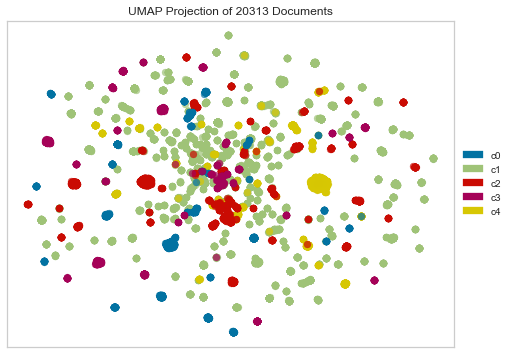

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [69]:
plot_model(lda, plot = 'umap')

In [70]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [71]:
save_model(lda,'Final LDA Model 08Feb2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100), model_name=Final LDA Model 08Feb2020, verbose=True)
INFO:logs:LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100)
INFO:logs:save_model() succesfully completed......................................


Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x26cc690eb48>,
 'Final LDA Model 08Feb2020.pkl')

In [72]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(model=lda, multi_core=True, supervised_target=None, estimator=None, optimize=None, custom_grid=None, auto_fe=True, fold=10, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=25)

Output()

INFO:logs:Importing libraries


INFO:logs:Objective : Unsupervised
INFO:logs:Defining model name
INFO:logs:Topic Model Name: Latent Dirichlet Allocation
INFO:logs:Defining supervised estimator
INFO:logs:Estimator: None
INFO:logs:Defining Optimizer
INFO:logs:Optimize: None
INFO:logs:Defining Tuning Grid
INFO:logs:Pre-defined Grid used
INFO:logs:Fitting Model with num_topics = 2
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(model=lda, multi_core=True, num_topics=2, verbose=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Defining topic model
INFO:logs:Model: Latent Dirichlet Allocation
INFO:logs:Defining num_topics parameter
INFO:logs:num_topics set to: 2
INFO:logs:LDA multi_core enabled
INFO:logs:LdaMulticore imported successfully
INFO:logs:LdaMulticore trained successfully
INFO:logs:LdaModel(num_terms=448, num_topics=2, decay=0.5, chunksize=100)
INF

INFO:logs:Visual Rendered Successfully
INFO:logs:LdaModel(num_terms=448, num_topics=400, decay=0.5, chunksize=100)
INFO:logs:tune_model() succesfully completed......................................


Best Model: Latent Dirichlet Allocation | # Topics: 400 | Coherence: 0.6681


In [74]:
tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'label')

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(model=lda, multi_core=True, supervised_target=label, estimator=None, optimize=None, custom_grid=None, auto_fe=True, fold=10, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=25)

Output()

INFO:logs:Importing libraries


INFO:logs:Objective : Regression
INFO:logs:Defining model name
INFO:logs:Topic Model Name: Latent Dirichlet Allocation
INFO:logs:Defining supervised estimator
INFO:logs:Estimator: lr
INFO:logs:Defining Optimizer
INFO:logs:Optimize: R2
INFO:logs:Problem : Supervised
INFO:logs:auto_fe param set to True
INFO:logs:Extracting Polarity
INFO:logs:Extracting Subjectivity
INFO:logs:Extracting Wordcount
INFO:logs:Defining Tuning Grid
INFO:logs:Pre-defined Grid used
INFO:logs:Fitting Model with num_topics = 2
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(model=lda, multi_core=True, num_topics=2, verbose=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Defining topic model
INFO:logs:Model: Latent Dirichlet Allocation
INFO:logs:Defining num_topics parameter
INFO:logs:num_topics set to: 2
INFO:logs:LDA multi_core enabled
INFO:logs:

INFO:logs:Visual Rendered Successfully
INFO:logs:LdaModel(num_terms=448, num_topics=200, decay=0.5, chunksize=100)
INFO:logs:tune_model() succesfully completed......................................


Best Model: Latent Dirichlet Allocation | # Topics: 200 | R2 : 0.6064
